In [52]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


pd.options.mode.chained_assignment = None
np.random.seed(1)


paris_listings = pd.read_csv('paris_airbnb.csv')

paris_listings = paris_listings.loc[np.random.permutation(len(paris_listings))]

#Nettoyer les données : Prix -> enlever les symboles ,$ puis convertir en float
stripped_commas= paris_listings['price'].astype(str).str.replace(',','')
stripped_commas_doll= stripped_commas.astype(str).str.replace('$','')

paris_listings['price'] = stripped_commas_doll.astype('float')



In [53]:
#On voit que certains paramètres ne peuvent pas être utilisé
#par la méthode distance euclidèene 
#data non numériques : city, room_type, state..
#data non ordinales : latitude, longitude, zipcode
#host_.. car concerne l'hote et pas le logement
#On supprime ces colonnes de la dataFrame
columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'longitude', 'zipcode','host_acceptance_rate' ,'host_response_rate', 'host_listings_count']

paris_listings= paris_listings.drop(columns, axis=1)

#On détecte les colomnes avec des valeurs manquantes
paris_listings.isnull().sum()

accommodates            0
bedrooms               24
bathrooms              58
beds                   14
price                   0
cleaning_fee         1750
security_deposit     1680
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

In [54]:
#cleaning_fee et security_deposit contiennent bcp de 0 
paris_listings= paris_listings.drop(['cleaning_fee','security_deposit'], axis=1)
paris_listings = paris_listings.dropna()

paris_listings.isnull().sum()



accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [55]:
#Dans ce cas multi variable, on normalise les features

new_listings = (paris_listings - paris_listings.mean()) / (paris_listings.std())
new_listings['price'] = paris_listings['price']


new_listings.head()
new_listings[['price']]


,price
4740,65.0
5606,98.0
4824,65.0
4205,45.0
3228,65.0
...,...
7935,72.0
5192,49.0
3980,99.0
235,230.0


2.022887452162708

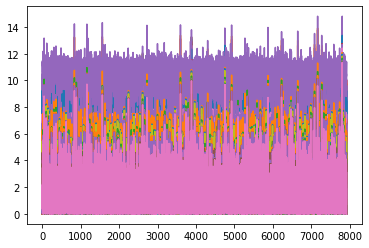

In [56]:
#Calcul de matrice de distance euclidèene

first_listings = new_listings.iloc[2][['accommodates','bedrooms','number_of_reviews']]
fifth_listings = new_listings.iloc[5400][['accommodates','bedrooms','number_of_reviews']]

dist = distance.euclidean(first_listings, fifth_listings)

euclid_matrix = distance.cdist(new_listings.iloc[:][['accommodates','bedrooms','number_of_reviews']], new_listings.iloc[:][['accommodates','bedrooms','number_of_reviews']], metric='euclidean')

import matplotlib.pyplot as plt

plt.plot(euclid_matrix)

euclid_matrix.mean()
    


In [57]:
#Utilisation de sklearn pour faire des prévisions
#Comparaison : Utilisation de quelques variables vs Utilisation de toutes les variables



train_df = new_listings.iloc[0:5999]
test_df = new_listings.iloc[6000:]

predictor_cols = ['accommodates', 'bedrooms', 'bathrooms', 'beds']


train_X = train_df[predictor_cols]
train_Y = train_df['price']

my_model = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
model_all_features = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

features = train_df.columns.to_list()
features.remove('price')

my_model.fit(train_X,train_Y)
model_all_features.fit(train_df[features],train_df['price'])


predictions = my_model.predict(test_df[predictor_cols]) 
predictions_all_features = model_all_features.predict(test_df[features]) 


print('Prédiction avec quelques variables : Calcul du rmse ' + str(np.sqrt(mean_squared_error(test_df['price'],predictions))))

print('Prédiction avec toutes les variables : Calcul du rmse ' + str(np.sqrt(mean_squared_error(test_df['price'],predictions_all_features))))

#Conclusion : Utiliser plus de X ne permet pas une meilleure 
# prédiction de Y pour cette méthode





Prédiction avec quelques variables : Calcul du rmse 73.6686141125829
Prédiction avec toutes les variables : Calcul du rmse 79.47518111426699
